In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import missingno as msn

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [50]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [99]:
df = pd.read_csv("moviemedium.csv")
df.head()

,Unnamed: 0,name,year,runtime,budget,genre1,genre2,genre3,rating,user_reviews,critic_reviews,metascore,release_date,count_videos,count_photos,trailer_duration,director,star1,star2,star3,company1,company2,company3,gross
0,0,The Shawshank Redemption,1994,2h 22m,"$25,000,000 (estimated)",Drama,-,-,9.30,9.7K,190,80.00,"March 10, 1995 (Turkey)",5,99+,2:11,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,Castle Rock Entertainment,-,-,"28,817,291"
1,1,The Dark Knight,2008,2h 32m,"$185,000,000 (estimated)",Action,Crime,Drama,9.00,7.7K,428,84.00,"July 25, 2008 (Turkey)",31,99+,0:33,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Warner Bros.,Legendary Entertainment,Syncopy,"1,005,973,645"
2,2,Inception,2010,2h 28m,"$160,000,000 (estimated)",Action,Adventure,Sci-Fi,8.80,4.4K,479,74.00,"July 30, 2010 (Turkey)",27,99+,1:45,Christopher Nolan,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Warner Bros.,Legendary Entertainment,Syncopy,"836,836,967"
3,3,Fight Club,1999,2h 19m,"$63,000,000 (estimated)",Drama,-,-,8.80,4.1K,366,66.00,"December 10, 1999 (Turkey)",8,99+,2:00,David Fincher,Brad Pitt,Edward Norton,Meat Loaf,Fox 2000 Pictures,New Regency Productions,Linson Films,"101,209,702"
4,4,Forrest Gump,1994,2h 22m,"$55,000,000 (estimated)",Drama,Romance,-,8.80,2.8K,165,82.00,"November 11, 1994 (Turkey)",12,99+,3:54,Robert Zemeckis,Tom Hanks,Robin Wright,Gary Sinise,Paramount Pictures,The Steve Tisch Company,Wendy Finerman Productions,"678,226,133"


In [100]:
df.columns

Index(['Unnamed: 0', 'name', 'year', 'runtime', 'budget', 'genre1', 'genre2',
       'genre3', 'rating', 'user_reviews', 'critic_reviews', 'metascore',
       'release_date', 'count_videos', 'count_photos', 'trailer_duration',
       'director', 'star1', 'star2', 'star3', 'company1', 'company2',
       'company3', 'gross'],
      dtype='object')

In [101]:
df = df.drop("Unnamed: 0", axis = 1)

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1000 non-null   object 
 1   year              1000 non-null   int64  
 2   runtime           1000 non-null   object 
 3   budget            788 non-null    object 
 4   genre1            1000 non-null   object 
 5   genre2            1000 non-null   object 
 6   genre3            1000 non-null   object 
 7   rating            1000 non-null   float64
 8   user_reviews      1000 non-null   object 
 9   critic_reviews    1000 non-null   int64  
 10  metascore         832 non-null    float64
 11  release_date      1000 non-null   object 
 12  count_videos      949 non-null    object 
 13  count_photos      949 non-null    object 
 14  trailer_duration  949 non-null    object 
 15  director          1000 non-null   object 
 16  star1             1000 non-null   object 
 

# gross-photos-videos

In [103]:
df["gross"] = [float(str(i).replace(",", "")) for i in df["gross"]]

In [104]:
df["gross"]

0       28817291.00
1     1005973645.00
2      836836967.00
3      101209702.00
4      678226133.00
           ...     
995             NaN
996        10249.00
997      2970161.00
998      9991258.00
999        16712.00
Name: gross, Length: 1000, dtype: float64

In [105]:
df["count_photos"]

0      99+
1      99+
2      99+
3      99+
4      99+
      ... 
995    99+
996     41
997     84
998    99+
999     48
Name: count_photos, Length: 1000, dtype: object

In [106]:
df["count_photos"] = [float(str(i).replace("+", "")) for i in df["count_photos"]]

In [107]:
df["count_videos"] = [float(str(i).replace("+", "")) for i in df["count_videos"]]

# budget

In [108]:
df["budget"]

0       $25,000,000 (estimated)
1      $185,000,000 (estimated)
2      $160,000,000 (estimated)
3       $63,000,000 (estimated)
4       $55,000,000 (estimated)
                 ...           
995      $3,500,000 (estimated)
996        $689,665 (estimated)
997     $12,000,000 (estimated)
998      $2,200,000 (estimated)
999                         NaN
Name: budget, Length: 1000, dtype: object

In [109]:
df["budget"] = df["budget"].str.replace(",", "").str.extract('(\d+)')
df["budget"] = [float(i) for i in df["budget"]]

In [110]:
df["budget"]

0      25000000.00
1     185000000.00
2     160000000.00
3      63000000.00
4      55000000.00
          ...     
995     3500000.00
996      689665.00
997    12000000.00
998     2200000.00
999            NaN
Name: budget, Length: 1000, dtype: float64

# trailer duration

In [111]:
df["trailer_duration"]

0      2:11
1      0:33
2      1:45
3      2:00
4      3:54
       ... 
995    2:55
996    1:51
997    1:44
998    2:11
999    1:30
Name: trailer_duration, Length: 1000, dtype: object

In [112]:
df["trailer_duration"] = df["trailer_duration"].fillna("0:0")

In [113]:
df1 = df['trailer_duration'].str.split(':', expand=True).astype(int)

In [114]:
df['trailer_duration'] = df1[0] * 60 + df1[1]

In [115]:
df["trailer_duration"]

0      131
1       33
2      105
3      120
4      234
      ... 
995    175
996    111
997    104
998    131
999     90
Name: trailer_duration, Length: 1000, dtype: int64

In [116]:
df["trailer_duration"].replace(0, np.nan, inplace=True)

In [117]:
df["trailer_duration"] = [float(str(i).replace(",", "")) for i in df["trailer_duration"]]

In [118]:
df["trailer_duration"]

0     131.00
1      33.00
2     105.00
3     120.00
4     234.00
       ...  
995   175.00
996   111.00
997   104.00
998   131.00
999    90.00
Name: trailer_duration, Length: 1000, dtype: float64

# runtime

In [119]:
df["runtime"]

0      2h 22m
1      2h 32m
2      2h 28m
3      2h 19m
4      2h 22m
        ...  
995    2h 14m
996    1h 30m
997    1h 59m
998    2h 40m
999    1h 43m
Name: runtime, Length: 1000, dtype: object

In [120]:
df["runtime"] = df["runtime"].str.replace("h", "").str.replace("m","")

In [121]:
df2 = df['runtime'].str.split(' ', expand=True)

In [122]:
df2 = df2.astype(float)

In [123]:
df['runtime'] = df2[0] * 60 + df2[1]

In [124]:
df["runtime"].replace(0, np.nan, inplace=True)

In [125]:
df["runtime"]

0     142.00
1     152.00
2     148.00
3     139.00
4     142.00
       ...  
995   134.00
996    90.00
997   119.00
998   160.00
999   103.00
Name: runtime, Length: 1000, dtype: float64

# month

In [126]:
df[["month", "month2"]] = df['release_date'].str.split(",", expand=True)

In [127]:
df[["month", "month2"]]

,month,month2
0,March 10,1995 (Turkey)
1,July 25,2008 (Turkey)
2,July 30,2010 (Turkey)
3,December 10,1999 (Turkey)
4,November 11,1994 (Turkey)
...,...,...
995,December 15,1967 (United States)
996,February 6,1942 (United States)
997,March 8,1991 (Turkey)
998,July 1975 (Canada),None


In [128]:
df["month"] = df["month"].str.replace('\d+', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [129]:
df["month"].value_counts()

February                     111
October                       97
December                      96
January                       88
March                         85
November                      71
September                     69
May                           68
April                         66
June                          64
July                          63
August                        44
October  (Turkey)             11
 (Turkey)                     10
December  (Turkey)            10
March  (Turkey)                8
November  (Turkey)             7
February  (Turkey)             7
January  (Turkey)              7
April  (Turkey)                6
May  (Turkey)                  4
September  (Turkey)            2
September  (Serbia)            1
 (Iran)                        1
December  (France)             1
December  (United States)      1
August  (United States)        1
July  (Canada)                 1
Name: month, dtype: int64

In [130]:
df = df.drop(["release_date", "month2"], axis = 1)

In [131]:
df["month"] = np.where(df["month"] == "October  (Turkey)", "October", df["month"])
df["month"] = np.where(df["month"] == "December  (Turkey)", "December", df["month"])
df["month"] = np.where(df["month"] == "March  (Turkey)", "March", df["month"])
df["month"] = np.where(df["month"] == "January  (Turkey)", "January", df["month"])
df["month"] = np.where(df["month"] == "February  (Turkey)", "February", df["month"])
df["month"] = np.where(df["month"] == "November  (Turkey)", "November", df["month"])
df["month"] = np.where(df["month"] == "April  (Turkey)", "April", df["month"])
df["month"] = np.where(df["month"] == "May  (Turkey)", "May", df["month"])
df["month"] = np.where(df["month"] == "September  (Turkey)", "September", df["month"])
df["month"] = np.where(df["month"] == "July  (Canada)", "July", df["month"])
df["month"] = np.where(df["month"] == "December  (United States)", "December", df["month"])
df["month"] = np.where(df["month"] == "August  (Canada)", "August", df["month"])
df["month"] = np.where(df["month"] == "August  (United States)", "August", df["month"])
df["month"] = np.where(df["month"] == "December  (France)", "December", df["month"])
df["month"] = np.where(df["month"] == "September  (Serbia)", "September", df["month"])
df["month"] = np.where(df["month"] == " (Iran)", np.NaN, df["month"])
df["month"] = np.where(df["month"] == " (Turkey)", np.NaN, df["month"])
df["month"] = df["month"].str.strip()

In [132]:
df.month.value_counts()

February     118
December     108
October      108
January       95
March         93
November      78
April         72
September     72
May           72
July          64
June          64
August        45
Name: month, dtype: int64

# user reviews

In [133]:
df["user_reviews"]

0      9.7K
1      7.7K
2      4.4K
3      4.1K
4      2.8K
       ... 
995     151
996     165
997     134
998     187
999      83
Name: user_reviews, Length: 1000, dtype: object

In [134]:
df[["a", "a1"]] = df[df["user_reviews"].str.contains("K")]["user_reviews"].str.split("K", expand = True)

In [135]:
df["a"] = df["a"].apply(lambda x: float(x) * 1000)

In [136]:
df.loc[df.a.isna(), 'a'] = df[~df["user_reviews"].str.contains("K")]["user_reviews"]

In [137]:
df["a"]

0     9700.00
1     7700.00
2     4400.00
3     4100.00
4     2800.00
        ...  
995       151
996       165
997       134
998       187
999        83
Name: a, Length: 1000, dtype: object

In [138]:
df.drop(["user_reviews", "a1"], axis=1, inplace=True)

In [139]:
df = df.rename(columns={'a':'user_reviews'})

In [140]:
df["user_reviews"] = df["user_reviews"].astype(float)

In [141]:
df["user_reviews"]

0     9700.00
1     7700.00
2     4400.00
3     4100.00
4     2800.00
        ...  
995    151.00
996    165.00
997    134.00
998    187.00
999     83.00
Name: user_reviews, Length: 1000, dtype: float64

# MISSING VALUE INVESTIGATION

In [142]:
df.isnull().any()

name                False
year                False
runtime              True
budget               True
genre1              False
genre2              False
genre3              False
rating              False
critic_reviews      False
metascore            True
count_videos         True
count_photos         True
trailer_duration     True
director            False
star1               False
star2               False
star3               False
company1            False
company2            False
company3            False
gross                True
month                True
user_reviews        False
dtype: bool

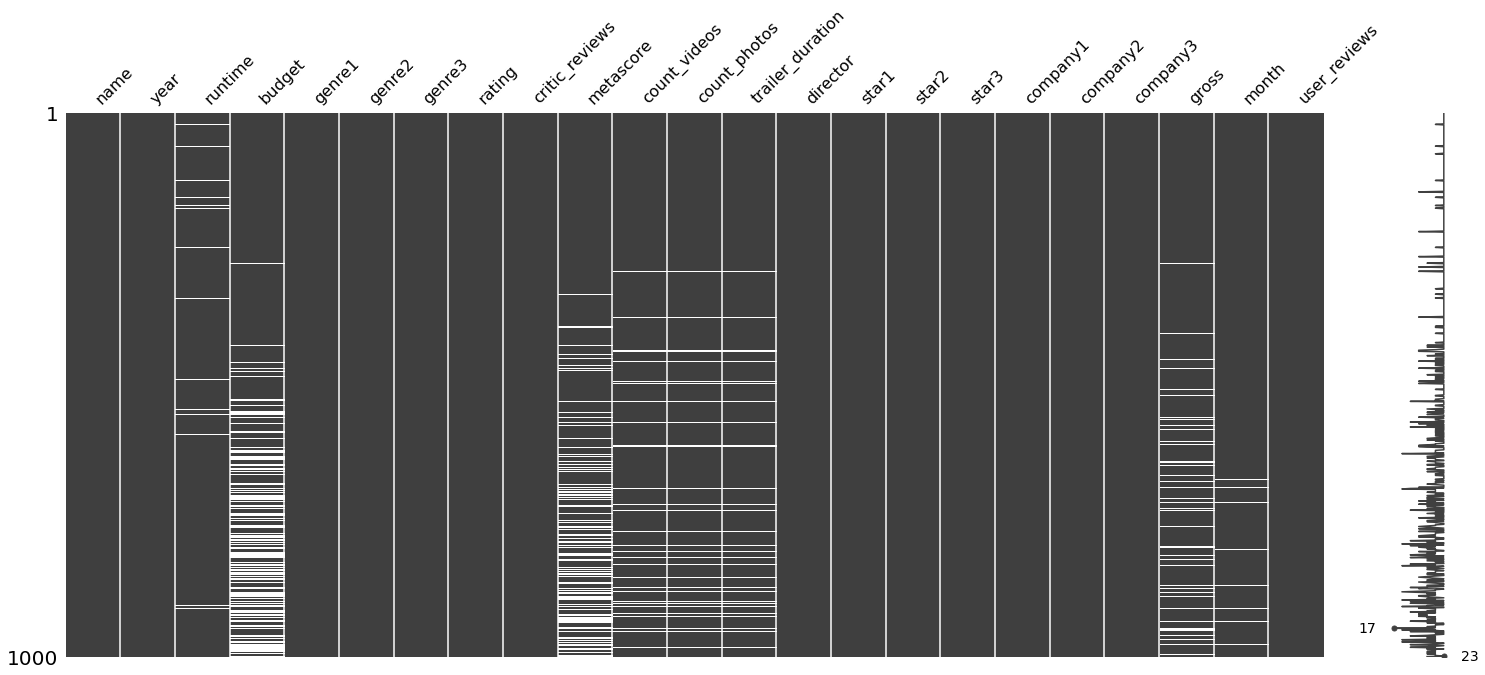

In [143]:
msn.matrix(df);

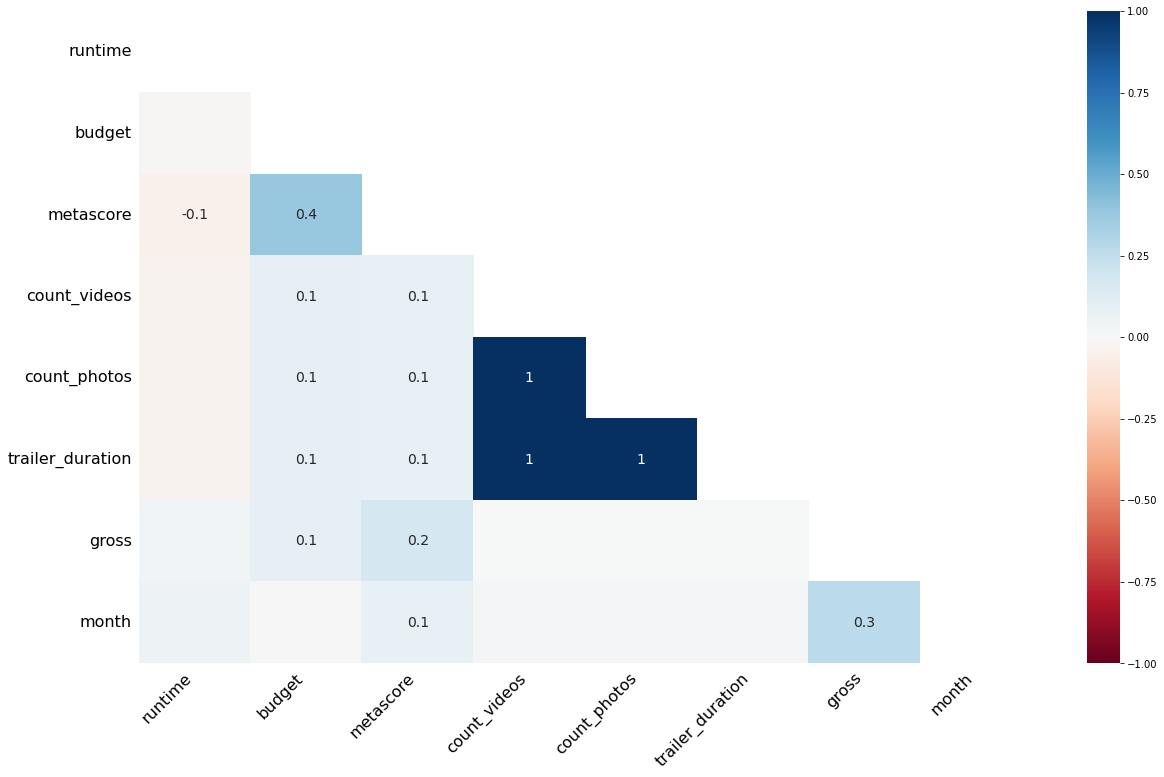

In [144]:
msn.heatmap(df)

In [149]:
from fancyimpute import KNN

In [150]:
df.columns

Index(['name', 'year', 'runtime', 'budget', 'genre1', 'genre2', 'genre3',
       'rating', 'critic_reviews', 'metascore', 'count_videos', 'count_photos',
       'trailer_duration', 'director', 'star1', 'star2', 'star3', 'company1',
       'company2', 'company3', 'gross', 'month', 'user_reviews'],
      dtype='object')

In [151]:
df.isnull().sum()

name                  0
year                  0
runtime              23
budget              212
genre1                0
genre2                0
genre3                0
rating                0
critic_reviews        0
metascore           168
count_videos         51
count_photos         51
trailer_duration     51
director              0
star1                 0
star2                 0
star3                 0
company1              0
company2              0
company3              0
gross                72
month                11
user_reviews          0
dtype: int64

In [152]:
num = df[['runtime', 'budget', 'metascore', 'count_videos', 'count_photos',
       'trailer_duration', 'gross']]

In [153]:
var_names=list(num)

In [154]:
knn_imp=KNN(k=5).fit_transform(num) #knn_imp, dfnin eksik verilerinin doldurulmuş yeni hali aynı shapete.

Imputing row 1/1000 with 0 missing, elapsed time: 0.547
Imputing row 101/1000 with 0 missing, elapsed time: 0.549
Imputing row 201/1000 with 0 missing, elapsed time: 0.550
Imputing row 301/1000 with 0 missing, elapsed time: 0.552
Imputing row 401/1000 with 0 missing, elapsed time: 0.553
Imputing row 501/1000 with 0 missing, elapsed time: 0.555
Imputing row 601/1000 with 0 missing, elapsed time: 0.558
Imputing row 701/1000 with 1 missing, elapsed time: 0.561
Imputing row 801/1000 with 1 missing, elapsed time: 0.566
Imputing row 901/1000 with 1 missing, elapsed time: 0.571


In [155]:
num=pd.DataFrame(knn_imp)
num.head()

,0,1,2,3,4,5,6
0,142.00,25000000.00,80.00,5.00,99.00,131.00,28817291.00
1,152.00,185000000.00,84.00,31.00,99.00,33.00,1005973645.00
2,148.00,160000000.00,74.00,27.00,99.00,105.00,836836967.00
3,139.00,63000000.00,66.00,8.00,99.00,120.00,101209702.00
4,142.00,55000000.00,82.00,12.00,99.00,234.00,678226133.00


In [156]:
num.columns=var_names
num.head()

,runtime,budget,metascore,count_videos,count_photos,trailer_duration,gross
0,142.00,25000000.00,80.00,5.00,99.00,131.00,28817291.00
1,152.00,185000000.00,84.00,31.00,99.00,33.00,1005973645.00
2,148.00,160000000.00,74.00,27.00,99.00,105.00,836836967.00
3,139.00,63000000.00,66.00,8.00,99.00,120.00,101209702.00
4,142.00,55000000.00,82.00,12.00,99.00,234.00,678226133.00


In [157]:
others = df[['name', 'year', 'genre1', 'genre2', 'genre3', 'rating', 'critic_reviews', 'director', 'star1', 'star2', 'star3', 'company1',
       'company2', 'company3', 'month', 'user_reviews']]

In [158]:
num.reset_index(drop=True, inplace=True)

In [159]:
others.reset_index(drop=True, inplace=True)

In [160]:
df_full = pd.concat([others, num], axis=1, ignore_index=False)

In [161]:
df_full.columns

Index(['name', 'year', 'genre1', 'genre2', 'genre3', 'rating',
       'critic_reviews', 'director', 'star1', 'star2', 'star3', 'company1',
       'company2', 'company3', 'month', 'user_reviews', 'runtime', 'budget',
       'metascore', 'count_videos', 'count_photos', 'trailer_duration',
       'gross'],
      dtype='object')

In [162]:
df_full.month.isnull().sum()

11

In [163]:
df_full.month.value_counts()

February     118
December     108
October      108
January       95
March         93
November      78
April         72
September     72
May           72
July          64
June          64
August        45
Name: month, dtype: int64

In [164]:
df_full.month.mode()

0    February
dtype: object

In [165]:
df_full["month"] = df_full["month"].fillna("February")

In [166]:
df = df_full.copy()

In [167]:
df.month.value_counts()

February     129
December     108
October      108
January       95
March         93
November      78
April         72
September     72
May           72
July          64
June          64
August        45
Name: month, dtype: int64

In [ ]:
# EDA with Tableau

In [169]:
df_graphs=df[['gross', 'year', 'rating', 'metascore', 'count_photos', 'trailer_duration',  
              'budget', 'user_reviews', 'runtime','critic_reviews', 'count_videos']]

In [170]:
df_graphs.corr()

,gross,year,rating,metascore,count_photos,trailer_duration,budget,user_reviews,runtime,critic_reviews,count_videos
gross,1.00,0.29,0.09,-0.09,0.20,-0.08,0.01,0.57,0.16,0.54,0.64
year,0.29,1.00,-0.09,-0.28,-0.13,-0.13,0.04,0.25,0.17,0.41,0.36
rating,0.09,-0.09,1.00,0.24,0.03,0.03,-0.03,0.38,0.25,-0.04,0.02
metascore,-0.09,-0.28,0.24,1.00,0.04,0.05,-0.07,-0.05,-0.02,-0.00,-0.06
count_photos,0.20,-0.13,0.03,0.04,1.00,0.00,0.01,0.24,-0.05,0.32,0.20
trailer_duration,-0.08,-0.13,0.03,0.05,0.00,1.00,0.00,-0.07,0.08,-0.09,-0.06
budget,0.01,0.04,-0.03,-0.07,0.01,0.00,1.00,-0.00,0.03,0.01,0.01
user_reviews,0.57,0.25,0.38,-0.05,0.24,-0.07,-0.00,1.00,0.22,0.50,0.50
runtime,0.16,0.17,0.25,-0.02,-0.05,0.08,0.03,0.22,1.00,0.03,0.08
critic_reviews,0.54,0.41,-0.04,-0.00,0.32,-0.09,0.01,0.50,0.03,1.00,0.66


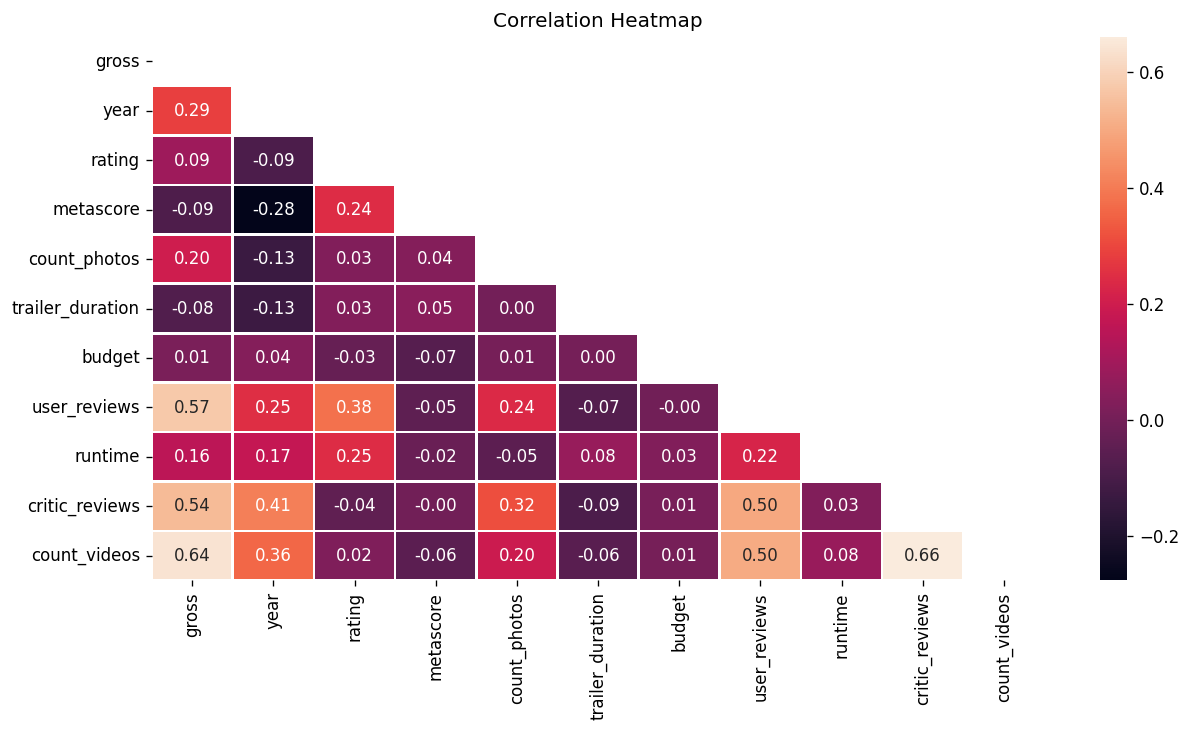

In [171]:
plt.figure(dpi = 120, figsize= (12,6))
mask = np.triu(np.ones_like(df_graphs.corr(),dtype = bool))
ax = sns.heatmap(df_graphs.corr(), mask = mask, fmt = ".2f", 
                 annot=True, lw=1, 
                 linewidths=0.5)
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
ax.set_ylim(11, 0)
plt.show()

# Feature Engineering

In [ ]:
df.head()

,name,year,genre1,genre2,genre3,rating,critic_reviews,director,star1,star2,star3,company1,company2,company3,month,user_reviews,runtime,budget,metascore,count_videos,count_photos,trailer_duration,gross
0,The Shawshank Redemption,1994,Drama,-,-,9.30,190,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,Castle Rock Entertainment,-,-,March,9700.00,142.00,25000000.00,80.00,5.00,99.00,131.00,28817291.00
1,The Dark Knight,2008,Action,Crime,Drama,9.00,428,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Warner Bros.,Legendary Entertainment,Syncopy,July,7700.00,152.00,185000000.00,84.00,31.00,99.00,33.00,1005973645.00
2,Inception,2010,Action,Adventure,Sci-Fi,8.80,479,Christopher Nolan,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Warner Bros.,Legendary Entertainment,Syncopy,July,4400.00,148.00,160000000.00,74.00,27.00,99.00,105.00,836836967.00
3,Fight Club,1999,Drama,-,-,8.80,366,David Fincher,Brad Pitt,Edward Norton,Meat Loaf,Fox 2000 Pictures,New Regency Productions,Linson Films,December,4100.00,139.00,63000000.00,66.00,8.00,99.00,120.00,101209702.00
4,Forrest Gump,1994,Drama,Romance,-,8.80,165,Robert Zemeckis,Tom Hanks,Robin Wright,Gary Sinise,Paramount Pictures,The Steve Tisch Company,Wendy Finerman Productions,November,2800.00,142.00,55000000.00,82.00,12.00,99.00,234.00,678226133.00


In [172]:
sumgrossbystars = df.groupby(["star1"])[["gross"]].sum().sort_values(by="gross", ascending=False)

In [173]:
sumgrossbystars.loc[(sumgrossbystars["gross"] > 2991216079.00), "star_new"] = 8 #"top"
sumgrossbystars.loc[(sumgrossbystars["gross"] > 959007513.00) & (sumgrossbystars["gross"] <= 2991216079.00), "star_new"] = 7 #"very high"
sumgrossbystars.loc[(sumgrossbystars["gross"] > 329803958.00) & (sumgrossbystars["gross"] <= 959007513.00), "star_new"] = 6 #"high"
sumgrossbystars.loc[(sumgrossbystars["gross"] > 221301809.00) & (sumgrossbystars["gross"] <= 329803958), "star_new"] = 5 #"above average"
sumgrossbystars.loc[(sumgrossbystars["gross"] > 187733202.00) & (sumgrossbystars["gross"] <= 221301809.00), "star_new"] = 4 #"average"
sumgrossbystars.loc[(sumgrossbystars["gross"] > 98467863.00) & (sumgrossbystars["gross"] <= 187733202.00), "star_new"] = 3 #"below average"
sumgrossbystars.loc[(sumgrossbystars["gross"] > 49396747.00) & (sumgrossbystars["gross"] <= 98467863.00), "star_new"] = 2 #"low"
sumgrossbystars.loc[(sumgrossbystars["gross"] > 968318.00) & (sumgrossbystars["gross"] <= 49396747.00 ), "star_new"] = 1 #"very low"
sumgrossbystars.loc[(sumgrossbystars["gross"] <= 968318.00), "star_new"] = 0 #"lowest"

In [174]:
sumgrossbydir = df.groupby(["director"])[["gross"]].sum().sort_values(by="gross", ascending=False)

In [175]:
sumgrossbydir.loc[(sumgrossbydir["gross"] > 2521602469.00), "director_new"] = 8
sumgrossbydir.loc[(sumgrossbydir["gross"] > 968234846.00) & (sumgrossbydir["gross"] <= 2521602469.00), "director_new"] = 7
sumgrossbydir.loc[(sumgrossbydir["gross"] > 499978317.00) & (sumgrossbydir["gross"] <= 968234846.00), "director_new"] = 6
sumgrossbydir.loc[(sumgrossbydir["gross"] > 339593416.00) & (sumgrossbydir["gross"] <= 499978317), "director_new"] = 5
sumgrossbydir.loc[(sumgrossbydir["gross"] > 136771683.00) & (sumgrossbydir["gross"] <= 339593416.00), "director_new"] = 4
sumgrossbydir.loc[(sumgrossbydir["gross"] > 98410061.00) & (sumgrossbydir["gross"] <= 136771683.00), "director_new"] = 3
sumgrossbydir.loc[(sumgrossbydir["gross"] > 49074379.00) & (sumgrossbydir["gross"] <= 98410061.00), "director_new"] = 2
sumgrossbydir.loc[(sumgrossbydir["gross"] > 981521.00) & (sumgrossbydir["gross"] <= 49074379.00 ), "director_new"] = 1
sumgrossbydir.loc[(sumgrossbydir["gross"] <= 981521.00), "director_new"] = 0

In [176]:
sumgrossbycomp = df.groupby(["company1"])[["gross"]].sum().sort_values(by="gross", ascending=False)

In [177]:
sumgrossbycomp.loc[(sumgrossbycomp["gross"] > 9155120291.00), "company_new"] = 8
sumgrossbycomp.loc[(sumgrossbycomp["gross"] > 991010833.00) & (sumgrossbycomp["gross"] <= 9155120291.00), "company_new"] = 7
sumgrossbycomp.loc[(sumgrossbycomp["gross"] > 486590368.00) & (sumgrossbycomp["gross"] <= 991010833.00), "company_new"] = 6
sumgrossbycomp.loc[(sumgrossbycomp["gross"] > 287544367.00) & (sumgrossbycomp["gross"] <= 486590368), "company_new"] = 5
sumgrossbycomp.loc[(sumgrossbycomp["gross"] > 209947037.00) & (sumgrossbycomp["gross"] <= 287544367.00), "company_new"] = 4
sumgrossbycomp.loc[(sumgrossbycomp["gross"] > 99335061.00) & (sumgrossbycomp["gross"] <= 209947037.00), "company_new"] = 3
sumgrossbycomp.loc[(sumgrossbycomp["gross"] > 19780116.00) & (sumgrossbycomp["gross"] <= 99335061.00), "company_new"] = 2
sumgrossbycomp.loc[(sumgrossbycomp["gross"] > 968853.00) & (sumgrossbycomp["gross"] <= 19780116.00 ), "company_new"] = 1
sumgrossbycomp.loc[(sumgrossbycomp["gross"] <= 968853.00), "company_new"] = 0

In [178]:
df = pd.merge(df,sumgrossbystars, on = ["star1"], how = "left" )

In [179]:
df= pd.merge(df, sumgrossbydir, on = "director", how = "left")

In [180]:
df.drop(["gross_y", "gross"], axis = 1, inplace = True)

In [181]:
df = pd.merge(df, sumgrossbycomp, on = "company1", how = "left")

In [182]:
df.drop(["gross"], axis = 1, inplace = True)

In [184]:
df1 = df.drop(["genre2", "genre3", "star1", "star2", "star3", "company1", "company2", "company3", "director"], axis=1)

In [185]:
df1.head()

,name,year,genre1,rating,critic_reviews,month,user_reviews,runtime,budget,metascore,count_videos,count_photos,trailer_duration,gross_x,star_new,director_new,company_new
0,The Shawshank Redemption,1994,Drama,9.30,190,March,9700.00,142.00,25000000.00,80.00,5.00,99.00,131.00,28817291.00,1.00,4.00,5.00
1,The Dark Knight,2008,Action,9.00,428,July,7700.00,152.00,185000000.00,84.00,31.00,99.00,33.00,1005973645.00,7.00,8.00,8.00
2,Inception,2010,Action,8.80,479,July,4400.00,148.00,160000000.00,74.00,27.00,99.00,105.00,836836967.00,8.00,8.00,8.00
3,Fight Club,1999,Drama,8.80,366,December,4100.00,139.00,63000000.00,66.00,8.00,99.00,120.00,101209702.00,6.00,7.00,7.00
4,Forrest Gump,1994,Drama,8.80,165,November,2800.00,142.00,55000000.00,82.00,12.00,99.00,234.00,678226133.00,8.00,7.00,7.00


In [186]:
data = df1.copy()

In [188]:
data.rating.value_counts().sort_index(ascending=False)

9.40      1
9.30      1
9.20      1
9.10      1
9.00      3
8.90      4
8.80      7
8.70      6
8.60     14
8.50     21
8.40     31
8.30     45
8.20     71
8.10    140
8.00    141
7.90    113
7.80    148
7.70    163
7.60     89
Name: rating, dtype: int64

In [189]:
data.loc[(data["rating"] > 8.90), "rating_new"] = 2 #"very high"
data.loc[(data["rating"] > 7.90) & (data["rating"] <= 8.90), "rating_new"] = 1 #"high"
data.loc[(data["rating"] > 7.50) & (data["rating"] <= 7.90), "rating_new"] = 0

In [190]:
data.critic_reviews.value_counts().sort_index(ascending=False)

906    1
833    1
783    1
746    1
733    1
      ..
12     2
10     1
7      4
5      2
4      1
Name: critic_reviews, Length: 409, dtype: int64

In [191]:
pd.cut(data.critic_reviews, bins=4, right=True)

0      (3.098, 229.5]
1      (229.5, 455.0]
2      (455.0, 680.5]
3      (229.5, 455.0]
4      (3.098, 229.5]
            ...      
995    (3.098, 229.5]
996    (3.098, 229.5]
997    (3.098, 229.5]
998    (3.098, 229.5]
999    (3.098, 229.5]
Name: critic_reviews, Length: 1000, dtype: category
Categories (4, interval[float64, right]): [(3.098, 229.5] < (229.5, 455.0] < (455.0, 680.5] <
                                           (680.5, 906.0]]

In [192]:
data.loc[(data["critic_reviews"] > 680.5) & (data["critic_reviews"] <= 906.0), "cr_reviews_new"] = 3 #"high"
data.loc[(data["critic_reviews"] > 455.0) & (data["critic_reviews"] <= 680.5), "cr_reviews_new"] = 2 #"average"
data.loc[(data["critic_reviews"] > 229.5) & (data["critic_reviews"] <= 455.0), "cr_reviews_new"] = 1 #"low"
data.loc[(data["critic_reviews"] > 3.098) & (data["critic_reviews"] <= 229.5), "cr_reviews_new"] = 0 #"lower"

In [193]:
data.cr_reviews_new.value_counts()

0.00    709
1.00    202
2.00     78
3.00     11
Name: cr_reviews_new, dtype: int64

In [195]:
data.user_reviews.value_counts().sort_index(ascending=False)

11100.00    1
9700.00     1
9300.00     1
7800.00     1
7700.00     1
           ..
72.00       1
66.00       3
61.00       1
52.00       1
22.00       1
Name: user_reviews, Length: 534, dtype: int64

In [196]:
pd.qcut(data.user_reviews, q=4)

0      (878.5, 11100.0]
1      (878.5, 11100.0]
2      (878.5, 11100.0]
3      (878.5, 11100.0]
4      (878.5, 11100.0]
             ...       
995    (21.999, 216.75]
996    (21.999, 216.75]
997    (21.999, 216.75]
998    (21.999, 216.75]
999    (21.999, 216.75]
Name: user_reviews, Length: 1000, dtype: category
Categories (4, interval[float64, right]): [(21.999, 216.75] < (216.75, 419.0] < (419.0, 878.5] <
                                           (878.5, 11100.0]]

In [197]:
data.loc[(data["user_reviews"] > 5000), "ur_reviews_new"] = 5 #"top"
data.loc[(data["user_reviews"] > 2000) & (data["user_reviews"] <= 5000), "ur_reviews_new"] = 4 #"very high"
data.loc[(data["user_reviews"] > 878.5) & (data["user_reviews"] <= 2000), "ur_reviews_new"] = 3 #"high"
data.loc[(data["user_reviews"] > 419.0) & (data["user_reviews"] <= 878.5), "ur_reviews_new"] = 2 #"medium"
data.loc[(data["user_reviews"] > 216.75) & (data["user_reviews"] <= 419.0), "ur_reviews_new"] = 1# "low"
data.loc[(data["user_reviews"] > 21.999) & (data["user_reviews"] <= 216.75), "ur_reviews_new"] = 0 #"lower"

In [198]:
data.runtime.describe()

count   1000.00
mean     123.57
std       28.25
min       64.00
25%      103.00
50%      119.00
75%      138.00
max      321.00
Name: runtime, dtype: float64

In [199]:
data.loc[(data["runtime"] > 180), "runtime_new"] = 3 #"more than 3 hours"
data.loc[(data["runtime"] > 140) & (data["runtime"] <= 180), "runtime_new"] = 2 #"about 3 hours"
data.loc[(data["runtime"] > 100) & (data["runtime"] <= 140), "runtime_new"] = 1 #"about 2 hours"
data.loc[(data["runtime"] > 63) & (data["runtime"] <= 100), "runtime_new"] = 0 #"more than 1 hour"

In [200]:
data.runtime_new.value_counts()

1.00    574
0.00    204
2.00    181
3.00     41
Name: runtime_new, dtype: int64

In [201]:
data.budget.describe()

count          1000.00
mean       99563893.43
std      1077241957.48
min           18000.00
25%         2000000.00
50%         8500000.00
75%        30000000.00
max     30000000000.00
Name: budget, dtype: float64

In [202]:
pd.qcut(data.budget, 10)

0        (24950959.262, 40000000.0]
1      (102100000.0, 30000000000.0]
2      (102100000.0, 30000000000.0]
3         (40000000.0, 102100000.0]
4         (40000000.0, 102100000.0]
                   ...             
995        (2588422.256, 4500000.0]
996        (17999.999, 1205595.271]
997         (8500000.0, 15000000.0]
998      (1595427.412, 2588422.256]
999      (1205595.271, 1595427.412]
Name: budget, Length: 1000, dtype: category
Categories (10, interval[float64, right]): [(17999.999, 1205595.271] < (1205595.271, 1595427.412] <
                                            (1595427.412, 2588422.256] < (2588422.256, 4500000.0] < ... <
                                            (15000000.0, 24950959.262] < (24950959.262, 40000000.0] <
                                            (40000000.0, 102100000.0] < (102100000.0, 30000000000.0]]

In [203]:
data.loc[(data["budget"] > 102100000.0), "new_budget"] = 9 #"top"
data.loc[(data["budget"] > 40000000.0) & (data["budget"] <= 102100000.0), "new_budget"] = 8 #"very high"
data.loc[(data["budget"] > 24950959.262) & (data["budget"] <= 40000000.0), "new_budget"] = 7 #"higher"
data.loc[(data["budget"] > 15000000.0) & (data["budget"] <= 24950959.262), "new_budget"] = 6 #"high"
data.loc[(data["budget"] > 8500000.0) & (data["budget"] <= 15000000.0), "new_budget"] = 5 #"above median"
data.loc[(data["budget"] > 4500000.0) & (data["budget"] <= 8500000.0), "new_budget"] = 4 #"below median"
data.loc[(data["budget"] > 2588422.256) & (data["budget"] <= 4500000.0), "new_budget"] = 3 #"low"
data.loc[(data["budget"] > 1595427.412) & (data["budget"] <= 2588422.256), "new_budget"] = 2 # "very low"
data.loc[(data["budget"] > 1205595.271) & (data["budget"] <= 1595427.412), "new_budget"] = 1 # "lowest"
data.loc[(data["budget"] > 17999.999) & (data["budget"] <= 1205595.271 ), "new_budget"] = 0 #"very low"

In [204]:
data.metascore.describe()

count   1000.00
mean      78.92
std       11.34
min       28.00
25%       72.91
50%       80.00
75%       87.00
max      100.00
Name: metascore, dtype: float64

In [205]:
pd.qcut(data.metascore, 4)

0        (72.906, 80.0]
1          (80.0, 87.0]
2        (72.906, 80.0]
3      (27.999, 72.906]
4          (80.0, 87.0]
             ...       
995       (87.0, 100.0]
996      (72.906, 80.0]
997      (72.906, 80.0]
998       (87.0, 100.0]
999      (72.906, 80.0]
Name: metascore, Length: 1000, dtype: category
Categories (4, interval[float64, right]): [(27.999, 72.906] < (72.906, 80.0] < (80.0, 87.0] <
                                           (87.0, 100.0]]

In [206]:
data.loc[(data["metascore"] > 87), "metascore_new"] = 3 #"top"
data.loc[(data["metascore"] > 80) & (data["metascore"] <= 87), "metascore_new"] = 2 #"very high"
data.loc[(data["metascore"] > 72.906) & (data["metascore"] <= 80), "metascore_new"] = 1 #"high"
data.loc[(data["metascore"] > 27.999) & (data["metascore"] <= 72.906), "metascore_new"] = 0 #"average and lower"

In [207]:
data.count_photos.describe()

count   1000.00
mean      89.10
std       19.76
min       13.00
25%       90.00
50%       99.00
75%       99.00
max       99.00
Name: count_photos, dtype: float64

In [208]:
data.loc[(data["count_photos"] > 89), "photos_new"] = 1 #"much"
data.loc[(data["count_photos"] > 12.99) & (data["count_photos"] <= 89), "photos_new"] = 0 #"little"

In [209]:
data.count_videos.describe()

count   1000.00
mean       6.67
std        9.74
min        1.00
25%        1.00
50%        3.00
75%        8.00
max       99.00
Name: count_videos, dtype: float64

In [211]:
data.loc[(data["count_videos"] > 56.99), "videos_new"] = 1 #"much"
data.loc[(data["count_videos"] > 0.99) & (data["count_videos"] <= 56.99), "videos_new"] = 0 #"little"

In [212]:
df.month.value_counts()

February     129
December     108
October      108
January       95
March         93
November      78
April         72
September     72
May           72
July          64
June          64
August        45
Name: month, dtype: int64

In [213]:
data.trailer_duration.describe()

count   1000.00
mean     125.11
std       51.56
min       13.00
25%       94.00
50%      129.00
75%      152.00
max      643.00
Name: trailer_duration, dtype: float64

In [214]:
data.loc[(data["trailer_duration"] > 119.99), "trailerdur_new"] = 1 #"2 hours and more"
data.loc[(data["trailer_duration"] > 12.99) & (data["trailer_duration"] <= 119.99), "trailerdur_new"] = 0 #"less than 2 hours"

In [217]:
data1 = data.drop(['rating', 'critic_reviews',
       'user_reviews', 'runtime', 'budget', 'metascore', 'count_videos',
       'count_photos', 'trailer_duration'], axis=1)

In [220]:
data1.genre1.value_counts()

Drama        295
Action       173
Comedy       153
Crime        110
Biography     85
Animation     83
Adventure     67
Horror        13
Mystery       11
Western        4
Fantasy        2
Film-Noir      2
Family         1
Thriller       1
Name: genre1, dtype: int64

In [221]:
genre_counts = data1.genre1.value_counts()
other_genres = list(genre_counts[genre_counts <= 13].index)

data1['genres'] = data1['genre1'].replace(other_genres, 'Other')

In [222]:
data1.month.value_counts()

February     129
December     108
October      108
January       95
March         93
November      78
April         72
September     72
May           72
July          64
June          64
August        45
Name: month, dtype: int64

In [223]:
month_counts = data1.month.value_counts()
other_months = list(month_counts[month_counts <= 78].index)

data1['month'] = data1['month'].replace(other_months, 'Other')

In [225]:
df_analiz=data1[['year', 'month', 'gross_x', 'star_new', 'director_new',
       'company_new', 'rating_new', 'cr_reviews_new', 'ur_reviews_new', 'runtime_new',
       'new_budget', 'metascore_new', 'photos_new', 'videos_new',
       'trailerdur_new', 'genres']]

In [226]:
X=df_analiz.drop(["gross_x"], axis=1)
y=df_analiz["gross_x"]

In [227]:
dms=pd.get_dummies(X[["genres", "month"]], drop_first=True) 
dms.head() 

,genres_Adventure,genres_Animation,genres_Biography,genres_Comedy,genres_Crime,genres_Drama,genres_Other,month_February,month_January,month_March,month_October,month_Other
0,0,0,0,0,0,1,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,1


In [228]:
X=pd.concat([X,dms],axis=1)

In [229]:
X.drop(["genres", "month"], axis=1, inplace=True)

In [230]:
X.head()

,year,star_new,director_new,company_new,rating_new,cr_reviews_new,ur_reviews_new,runtime_new,new_budget,metascore_new,photos_new,videos_new,trailerdur_new,genres_Adventure,genres_Animation,genres_Biography,genres_Comedy,genres_Crime,genres_Drama,genres_Other,month_February,month_January,month_March,month_October,month_Other
0,1994,1.00,4.00,5.00,2.00,0.00,5.00,2.00,7.00,1.00,1.00,0.00,1.00,0,0,0,0,0,1,0,0,0,1,0,0
1,2008,7.00,8.00,8.00,2.00,1.00,5.00,2.00,9.00,2.00,1.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,1
2,2010,8.00,8.00,8.00,1.00,2.00,4.00,2.00,9.00,1.00,1.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,1
3,1999,6.00,7.00,7.00,1.00,1.00,4.00,1.00,8.00,0.00,1.00,0.00,1.00,0,0,0,0,0,1,0,0,0,0,0,0
4,1994,8.00,7.00,7.00,1.00,0.00,4.00,2.00,8.00,2.00,1.00,0.00,1.00,0,0,0,0,0,1,0,0,0,0,0,1


In [231]:
X2 = X.copy()

X2['total_reviews'] = X2['cr_reviews_new'] + X2["ur_reviews_new"]
X2['total_documents'] = X2['photos_new'] + X2["videos_new"]
X2['meta_rating'] = (X2['rating_new']+1) * (X2["metascore_new"]+1)
X2['star_dir_comp'] = (X2['director_new']+1) * (X2["star_new"]+1) * (X2["company_new"]+1)


In [232]:
X2.head()

,year,star_new,director_new,company_new,rating_new,cr_reviews_new,ur_reviews_new,runtime_new,new_budget,metascore_new,photos_new,videos_new,trailerdur_new,genres_Adventure,genres_Animation,genres_Biography,genres_Comedy,genres_Crime,genres_Drama,genres_Other,month_February,month_January,month_March,month_October,month_Other,total_reviews,total_documents,meta_rating,star_dir_comp
0,1994,1.00,4.00,5.00,2.00,0.00,5.00,2.00,7.00,1.00,1.00,0.00,1.00,0,0,0,0,0,1,0,0,0,1,0,0,5.00,1.00,6.00,60.00
1,2008,7.00,8.00,8.00,2.00,1.00,5.00,2.00,9.00,2.00,1.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,1,6.00,1.00,9.00,648.00
2,2010,8.00,8.00,8.00,1.00,2.00,4.00,2.00,9.00,1.00,1.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,1,6.00,1.00,4.00,729.00
3,1999,6.00,7.00,7.00,1.00,1.00,4.00,1.00,8.00,0.00,1.00,0.00,1.00,0,0,0,0,0,1,0,0,0,0,0,0,5.00,1.00,2.00,448.00
4,1994,8.00,7.00,7.00,1.00,0.00,4.00,2.00,8.00,2.00,1.00,0.00,1.00,0,0,0,0,0,1,0,0,0,0,0,1,4.00,1.00,6.00,576.00


In [233]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, 
                                                    test_size=0.30, 
                                                    random_state=14)

In [234]:
lm1=sm.OLS(y_train,X_train)

In [235]:
model1=lm1.fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                gross_x   R-squared (uncentered):                   0.789
Model:                            OLS   Adj. R-squared (uncentered):              0.780
Method:                 Least Squares   F-statistic:                              93.00
Date:                Wed, 23 Feb 2022   Prob (F-statistic):                   1.13e-206
Time:                        08:21:21   Log-Likelihood:                         -14084.
No. Observations:                 700   AIC:                                  2.822e+04
Df Residuals:                     673   BIC:                                  2.834e+04
Df Model:                          27                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
year              4.276e+04   1.44e+04      2.963      0.003    1.44e+04    7.11e+04
star_new         -1.153e+07   4.01e+06     -2.873      0.004   -1.94e+07   -3.65e+06
director_new     -1.392e+07   3.97e+06     -3.504      0.000   -2.17e+07   -6.12e+06
company_new      -1.238e+07   2.68e+06     -4.623      0.000   -1.76e+07   -7.12e+06
rating_new       -2.928e+06   2.51e+07     -0.117      0.907   -5.22e+07    4.64e+07
cr_reviews_new    3.357e+07   7.52e+06      4.466      0.000    1.88e+07    4.83e+07
ur_reviews_new   -1.067e+07   6.15e+06     -1.735      0.083   -2.28e+07    1.41e+06
runtime_new       1.036e+07   8.08e+06      1.282      0.200   -5.51e+06    2.62e+07
new_budget        1.185e+06   2.69e+06      0.441      0.660    -4.1e+06    6.47e+06
metascore_new     1.374e+06   1.49e+07      0.092      0.927   -2.79e+07    3.06e+07
photos_new       -4.168e+08   4.66e+07     -8.942      0.000   -5.08e+08   -3.25e+08
videos_new        8.228e+08   9.16e+07      8.978      0.000    6.43e+08       1e+09
trailerdur_new    4.102e+06   1.05e+07      0.390      0.697   -1.66e+07    2.48e+07
genres_Adventure -1.773e+07   2.38e+07     -0.746      0.456   -6.44e+07    2.89e+07
genres_Animation  6.547e+07   2.39e+07      2.735      0.006    1.85e+07    1.12e+08
genres_Biography -4.441e+07   2.24e+07     -1.982      0.048   -8.84e+07   -4.06e+05
genres_Comedy    -1.551e+07   1.98e+07     -0.784      0.433   -5.43e+07    2.33e+07
genres_Crime     -5.973e+07   2.13e+07     -2.807      0.005   -1.02e+08   -1.79e+07
genres_Drama     -2.677e+07   1.74e+07     -1.535      0.125    -6.1e+07    7.47e+06
genres_Other      -5.61e+07   3.09e+07     -1.814      0.070   -1.17e+08    4.62e+06
month_February    -4.46e+07   2.13e+07     -2.094      0.037   -8.64e+07   -2.79e+06
month_January    -4.272e+07   2.28e+07     -1.870      0.062   -8.76e+07    2.14e+06
month_March      -5.106e+07   2.29e+07     -2.229      0.026    -9.6e+07   -6.08e+06
month_October    -7.024e+07   2.26e+07     -3.113      0.002   -1.15e+08   -2.59e+07
month_Other      -4.923e+07   1.75e+07     -2.816      0.005   -8.36e+07   -1.49e+07
total_reviews      2.29e+07   3.36e+06      6.811      0.000    1.63e+07    2.95e+07
total_documents    4.06e+08    4.6e+07      8.825      0.000    3.16e+08    4.96e+08
meta_rating       -1.15e+06   9.33e+06     -0.123      0.902   -1.95e+07    1.72e+07
star_dir_comp     1.382e+06    7.8e+04     17.714      0.000    1.23e+06    1.54e+06
==============================================================================
Omnibus:                      519.891   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            24678.740
Skew:                      

In [236]:
model1.mse_total

8.283799442716034e+16

In [237]:
lm2=LinearRegression()
model2=lm2.fit(X_train, y_train)

In [238]:
model1.mse_model

1.69370365251217e+18

In [239]:
model2.intercept_

1101660046.2646098

In [240]:
model1.mse_resid

1.8211883330139136e+16

In [ ]:
#model.coef_

In [241]:
np.sqrt(-cross_val_score(model2,X_test,y_test,cv=5,scoring="neg_mean_squared_error")).mean()

198580875.74674731

In [242]:
cross_val_score(model2,X_test,y_test,cv=5,scoring="r2").mean()

0.5199222321550826

In [245]:
cross_val_score(model2,X_test,y_test,cv=5,scoring="r2")

array([0.19057782, 0.58538382, 0.59933981, 0.47871364, 0.74559607])

# LASSO

In [246]:
std = StandardScaler()
std.fit(X_train.values)

StandardScaler()

In [247]:
X_tr = std.transform(X_train.values)
X_te = std.transform(X_test.values)

In [248]:
from sklearn.linear_model import RidgeCV
lambdalar = 10**np.linspace(10,-2,100)*0.5 
lasso_cv = LassoCV(alphas = lambdalar, 
                   normalize = False,
                   cv=5)
#print(lambdalar)
lasso_model = lasso_cv.fit(X_tr, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,


In [249]:
lasso_tuned = Lasso(alpha = lasso_model.alpha_,).fit(X_tr,y_train)

In [250]:
list(zip(X_train.columns, lasso_tuned.coef_))

[('year', -10845485.536417115),
 ('star_new', -25117176.01611355),
 ('director_new', -30626989.58763132),
 ('company_new', -36077553.439308286),
 ('rating_new', -1600092.9430981781),
 ('cr_reviews_new', 33518073.17200368),
 ('ur_reviews_new', 0.0),
 ('runtime_new', 8408711.572477674),
 ('new_budget', 6527146.420119322),
 ('metascore_new', -0.0),
 ('photos_new', -7573331.9314920055),
 ('videos_new', 46141519.443726875),
 ('trailerdur_new', 1783989.0954049171),
 ('genres_Adventure', -4109194.811004783),
 ('genres_Animation', 20347093.717993125),
 ('genres_Biography', -11293453.508547843),
 ('genres_Comedy', -4319894.033194619),
 ('genres_Crime', -17505894.222079474),
 ('genres_Drama', -10222221.941096058),
 ('genres_Other', -10797115.050593553),
 ('month_February', -13217478.340109685),
 ('month_January', -11066381.858891435),
 ('month_March', -13127712.114659308),
 ('month_October', -18664390.676943354),
 ('month_Other', -20875016.669651136),
 ('total_reviews', 20826759.705489773),
 ('t

In [251]:
np.sqrt(mean_squared_error(y_test, lasso_tuned.predict(X_te)))

169382102.38240543

In [252]:
r2_score(y_test, lasso_tuned.predict(X_te))

0.7088665728398277

# RIDGE

In [ ]:
from sklearn.linear_model import RidgeCV
lambdalar = 10**np.linspace(10,-2,100)*0.5 
ridge_cv = RidgeCV(alphas = lambdalar, 
                   scoring = "neg_mean_squared_error",
                   normalize = False,
                   cv=5)
#print(lambdalar)
ridge_model = ridge_cv.fit(X_tr, y_train)

In [255]:
ridge_model.alpha_

0.005

In [256]:
ridge_tuned = Ridge(alpha = ridge_model.alpha_).fit(X_tr,y_train)

In [257]:
list(zip(X_train.columns, ridge_tuned.coef_))

[('year', -11899302.10799513),
 ('star_new', -26769250.143095795),
 ('director_new', -32637245.599655204),
 ('company_new', -37551378.03967808),
 ('rating_new', -975771.9836758978),
 ('cr_reviews_new', 35400127.113286234),
 ('ur_reviews_new', 4058542.797941293),
 ('runtime_new', 8834234.770003349),
 ('new_budget', 6588805.851630631),
 ('metascore_new', 1774719.9500015208),
 ('photos_new', -6135282.326644896),
 ('videos_new', 46420304.63561672),
 ('trailerdur_new', 2296516.209567288),
 ('genres_Adventure', -5196605.370224206),
 ('genres_Animation', 20474261.09119803),
 ('genres_Biography', -11935866.323314885),
 ('genres_Comedy', -5198755.04193364),
 ('genres_Crime', -18497197.08588969),
 ('genres_Drama', -11563096.077406026),
 ('genres_Other', -11739949.10678084),
 ('month_February', -15006705.14982916),
 ('month_January', -12822955.529421106),
 ('month_March', -14816281.995051622),
 ('month_October', -20392896.12797374),
 ('month_Other', -23533582.169685025),
 ('total_reviews', 171188

In [258]:
np.sqrt(mean_squared_error(y_test, ridge_tuned.predict(X_te)))

169316040.822013

In [259]:
r2_score(y_test, ridge_tuned.predict(X_te))

0.7090936213612932

In [260]:
importances_ridge = pd.DataFrame({'feature':X_train.columns,'Ridge Importance':np.round(ridge_tuned.coef_,4)})
importances_ridge = importances_ridge.iloc[(-np.abs(importances_ridge['Ridge Importance'].values)).argsort()].set_index('feature')
importances_ridge

,Ridge Importance
feature,
star_dir_comp,240856203.62
videos_new,46420304.64
company_new,-37551378.04
cr_reviews_new,35400127.11
director_new,-32637245.60
star_new,-26769250.14
month_Other,-23533582.17
genres_Animation,20474261.09
month_October,-20392896.13


In [261]:
importances_lasso = pd.DataFrame({'feature':X_train.columns,'Lasso Importance':np.round(lasso_tuned.coef_,4)})
importances_lasso = importances_lasso.iloc[(-np.abs(importances_lasso['Lasso Importance'].values)).argsort()].set_index('feature')
importances_lasso

,Lasso Importance
feature,
star_dir_comp,237466449.75
videos_new,46141519.44
company_new,-36077553.44
cr_reviews_new,33518073.17
director_new,-30626989.59
star_new,-25117176.02
month_Other,-20875016.67
total_reviews,20826759.71
genres_Animation,20347093.72
